In [389]:
import networkx as nx
import graphviz as gv

G = nx.Graph()

G.add_edge(1, 2, w=0.5)
G.add_edge(2, 3, w=1.2)
G.add_edge(1, 3, w=0.8)

print(G.get_edge_data(2, 3)['w'])
print(nx.to_dict_of_lists(G))
print(nx.to_dict_of_dicts(G))
print(G.edges.data())

1.2
{1: [2, 3], 2: [1, 3], 3: [2, 1]}
{1: {2: {'w': 0.5}, 3: {'w': 0.8}}, 2: {1: {'w': 0.5}, 3: {'w': 1.2}}, 3: {2: {'w': 1.2}, 1: {'w': 0.8}}}
[(1, 2, {'w': 0.5}), (1, 3, {'w': 0.8}), (2, 3, {'w': 1.2})]


In [390]:
def readAdjl(fn, weighted=False):
    Gr = nx.Graph()
    with open(fn) as f:
        for line in f:
            line = line.strip().split()
            if weighted:
                Gr.add_edge(int(line[0]), int(line[1]), w = float(line[2]))
            else:
                Gr.add_edge(int(line[0]), int(line[1]))
    return Gr

In [391]:
def readMatrix(fn, weighted=False):
    Gr = nx.Graph()
    with open(fn) as f:
        for i, line in enumerate(f):
            line = line.strip().split()
            for j, value in enumerate(line):
                if (value == '0'):
                    continue
                if weighted:
                    Gr.add_edge(i + 1, j + 1, w=float(value))
                else:
                    Gr.add_edge(i + 1, j + 1)
    return Gr

In [392]:
F = readAdjl('data/adjl.txt', True)
print(F)
print(F.edges.data())

Graph with 3 nodes and 3 edges
[(1, 2, {'w': 0.5}), (1, 3, {'w': 0.8}), (2, 3, {'w': 1.2})]


In [393]:
H = readMatrix('data/matrix.txt', True)
print(H.edges.data())

[(1, 2, {'w': 1.0}), (1, 3, {'w': 1.0}), (2, 3, {'w': 1.0}), (2, 4, {'w': 1.0})]


In [394]:
def adjlShow(G, labels=None, directed=False, weighted=False, path=[], simplepath=True, layout="sfdp", defaultcolor="gray"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = defaultcolor
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  added = set()
  for node in G.nodes():
    g.node(str(node), labels[node - 1] if labels else str(node))
  def _addEdge(u, v, weighted):
      if weighted:
        g.edge(str(u), str(v), str(G.get_edge_data(u, v)['w']), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if simplepath:
    for i in range(len(path) - 1):
      u = path[i]
      v = path[i + 1]
      _addEdge(u, v, weighted)
  else:
    for u, v in path:
      _addEdge(u, v, weighted)
  
  aux = G.edges.data()
  for u, v, dc in aux:
    if not f"{u},{v}" in added:
      added.add(f"{u},{v}")
      if not directed:
        added.add(f"{v},{u}")
      if weighted:
        g.edge(str(u), str(v), str(dc["w"]))
      else:
        g.edge(str(u), str(v))
  return g

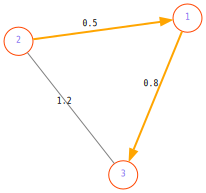

In [395]:
adjlShow(G, weighted=True, path=[2, 1, 3], simplepath=True)

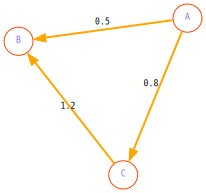

In [396]:
adjlShow(G, labels="ABC", weighted=True, path=[(1, 2), (1, 3), (3, 2)], simplepath=False)

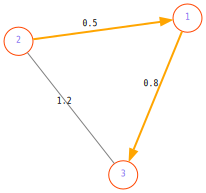

In [397]:
adjlShow(F, weighted=True, path=[2, 1, 3], simplepath=True)

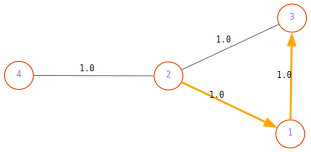

In [398]:
adjlShow(H, weighted=True, path=[2, 1, 3], simplepath=True)